In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Algerian_forest_fires_dataset_UPDATE.csv to Algerian_forest_fires_dataset_UPDATE.csv


In [17]:
# Reading Dataset
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head() # Checking the first 5 data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [9]:
# Checking Data and cleaning


In [20]:
# Checking for Null valyes
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [21]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [22]:
# Taking copy of the original data
df_copy=df.copy()

In [23]:
# Dropping rows which having null values
df_copy.drop([122,123, 167],axis=0, inplace=True)
df_copy = df_copy.reset_index()
df_copy.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [24]:
df.shape

(246, 14)

In [25]:
df_copy.shape

(243, 15)

In [26]:
# Show all the columns
df_copy.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [30]:
# Column name having extra space
[x for x in df.columns if ' ' in x]

[' RH', ' Ws', 'Rain ', 'Classes  ']

In [31]:
# Remove extra space from column names
df_copy.columns = df_copy.columns.str.strip()
df_copy.columns

  


Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [32]:
# dropping Classes feature
df_copy.drop('Classes',axis=1,inplace=True)
df_copy.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5


In [33]:
# dropping index feature
df_copy.drop('index',axis=1,inplace=True)
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5


In [35]:
# Create Date Feature from day,month,year
df_copy['date'] = pd.to_datetime(df_copy[['day', 'month', 'year']])
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,2012-06-02
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,2012-06-04
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,2012-06-05


In [38]:
# Create date feature in dataset by replacing day,month,year
df_copy.drop(['day', 'month', 'year'], axis = 1, inplace = True)
df_copy.head()

KeyError: ignored

In [40]:

df_copy.loc[:122, 'Region'] = 0
df_copy.loc[122:, 'Region'] = 1

In [41]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,2012-06-02,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,2012-06-04,0.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,2012-06-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,2012-09-26,1.0
239,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,2012-09-27,1.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,2012-09-28,1.0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,2012-09-29,1.0


In [44]:
# Checking Null values
df_copy.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
date           0
Region         0
dtype: int64

In [46]:
# Checking for duplicate values
df_copy.duplicated().sum()

0

In [47]:
# Checking the data types 
df_copy.dtypes

Temperature            object
RH                     object
Ws                     object
Rain                   object
FFMC                   object
DMC                    object
DC                     object
ISI                    object
BUI                    object
FWI                    object
date           datetime64[ns]
Region                float64
dtype: object

In [49]:
# Changing the datatypes
df_copy['Temperature']=df_copy['Temperature'].astype(int)
df_copy['RH']=df_copy['RH'].astype(int)
df_copy['Ws']=df_copy['Ws'].astype(int)
df_copy['Rain']=df_copy['Rain'].astype(float)
df_copy['FFMC']=df_copy['FFMC'].astype(float)
df_copy['DMC']=df_copy['DMC'].astype(float)
df_copy['ISI']=df_copy['ISI'].astype(float)
df_copy['BUI']=df_copy['BUI'].astype(float)

In [50]:
# Checking the data types after changing
df_copy.dtypes

Temperature             int64
RH                      int64
Ws                      int64
Rain                  float64
FFMC                  float64
DMC                   float64
DC                     object
ISI                   float64
BUI                   float64
FWI                    object
date           datetime64[ns]
Region                float64
dtype: object

In [51]:
# Checking unique values
df_copy.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            126
date           122
Region           2
dtype: int64

In [53]:
df_copy.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


In [54]:
# Segregate Numerical feature from the dataset
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [55]:
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'ISI',
 'BUI',
 'date',
 'Region']

In [59]:
# Segregate Categorical feature from the dataset
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

In [60]:
categorical_features

['DC', 'FWI']

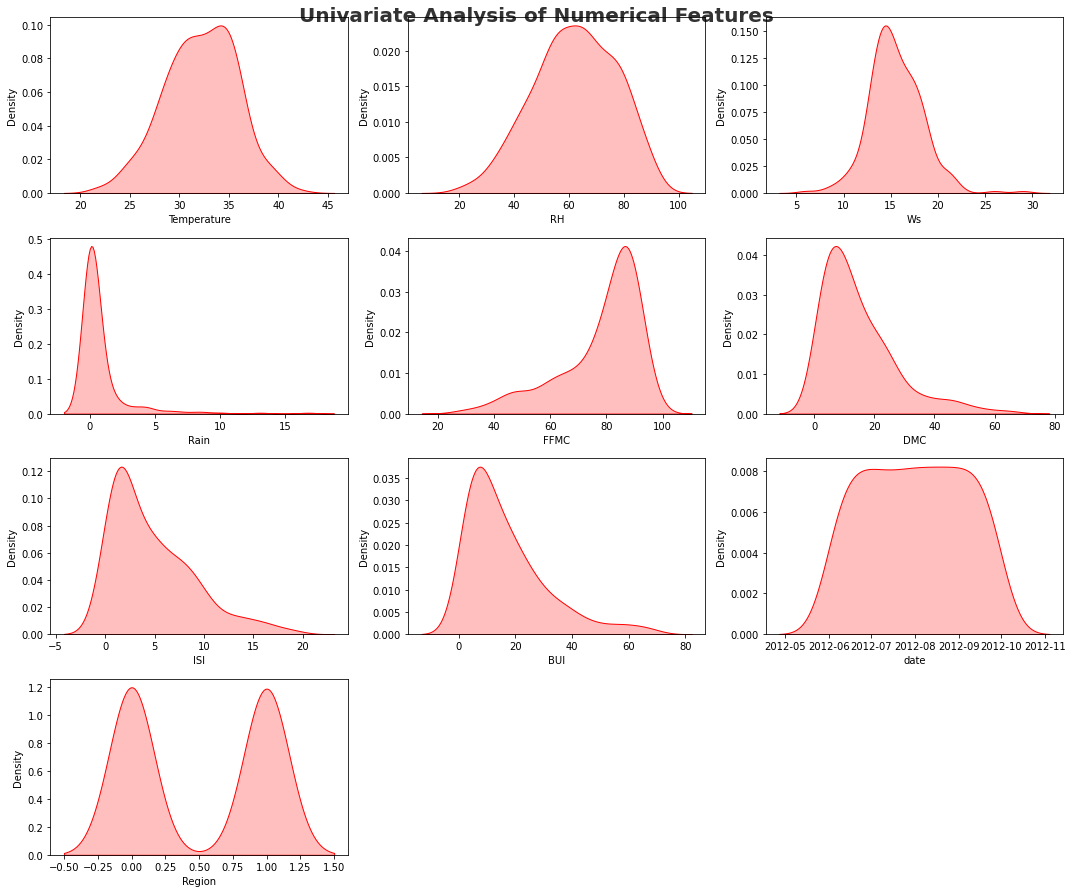

In [62]:
# Graphical Analysis
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [64]:
## Outliers handling


Text(0.5, 1.0, 'Before Removing Outliers')

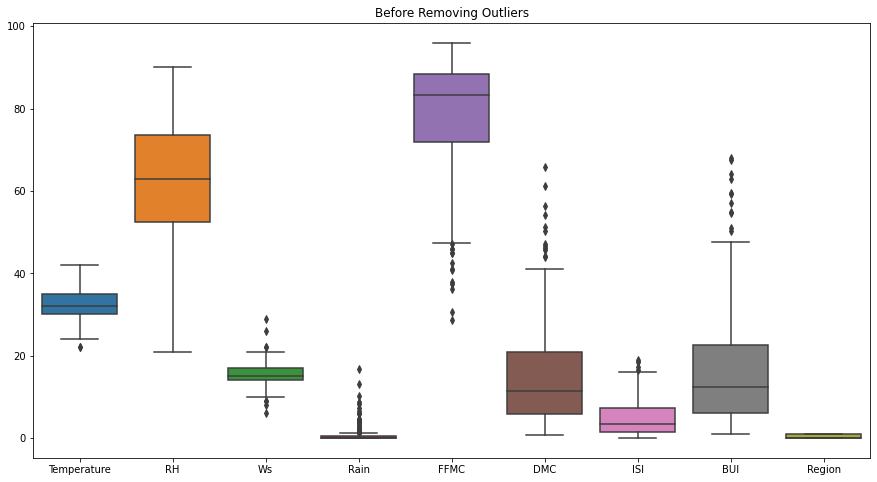

In [67]:
# Checking for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_copy)
plt.title("Before Removing Outliers")

In [80]:
q = df_copy['Ws'].quantile(0.98)
# we are removing the top 2% data from the Ws column
df_copy_cleaned = df_copy[df_copy['Ws']<q]

q = df_copy['Rain'].quantile(0.98)
# we are removing the top 2% data from the Rain column
df_copy_cleaned = df_copy[df_copy['Rain']<q]

q = df_copy['FFMC'].quantile(0.98)
# we are removing the top 2% data from the FFMC column
df_copy_cleaned = df_copy[df_copy['FFMC']<q]

q = df_copy['DMC'].quantile(0.98)
# we are removing the top 2% data from the DMC column
df_copy_cleaned = df_copy[df_copy['DMC']<q]

q = df_copy['ISI'].quantile(0.99)
# we are removing the top 1% data from the ISI column
df_copy_cleaned = df_copy[df_copy['ISI']<q]

q = df_copy['BUI'].quantile(0.98)
# we are removing the top 2% data from the BUI column
df_copy_cleaned = df_copy[df_copy['BUI']<q]



In [81]:
df_copy_cleaned.shape

(227, 12)

In [82]:
df_copy.shape

(243, 12)

Text(0.5, 1.0, 'After Removing Outliers')

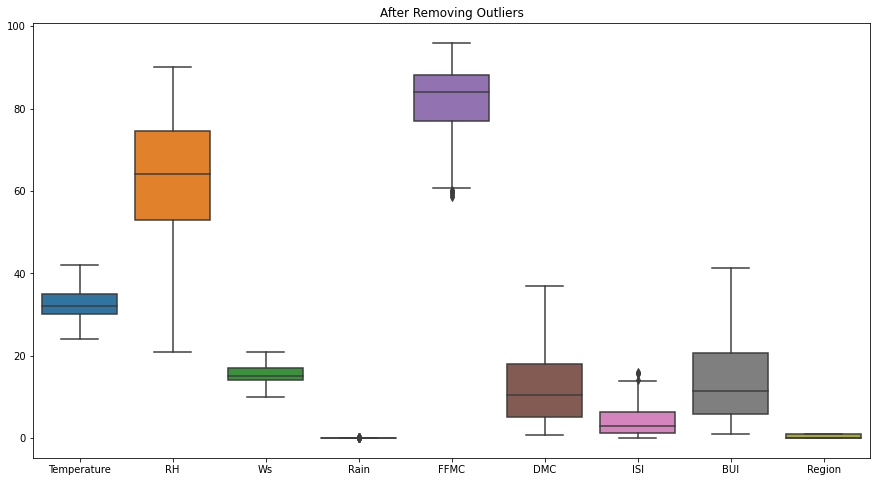

In [83]:
# Box plot for all the features after handling outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_copy_cleaned)
plt.title("After Removing Outliers")

In [84]:
# Check all the null values after the removal of outliers
df_copy_cleaned.isnull().sum()

Temperature     2
RH              0
Ws              8
Rain           81
FFMC           28
DMC             1
DC              0
ISI             4
BUI             0
FWI             0
date            0
Region          0
dtype: int64

In [85]:
# fill all null values with mean
df_copy_cleaned.fillna(df_copy_cleaned.mean().round(1), inplace=True)

In [87]:
# Check sum of null value in all the features after filling with null values
df_copy_cleaned.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
date           0
Region         0
dtype: int64

In [89]:
X = df_copy_cleaned.drop(columns = ['Region'])
y = df_copy_cleaned['Region']

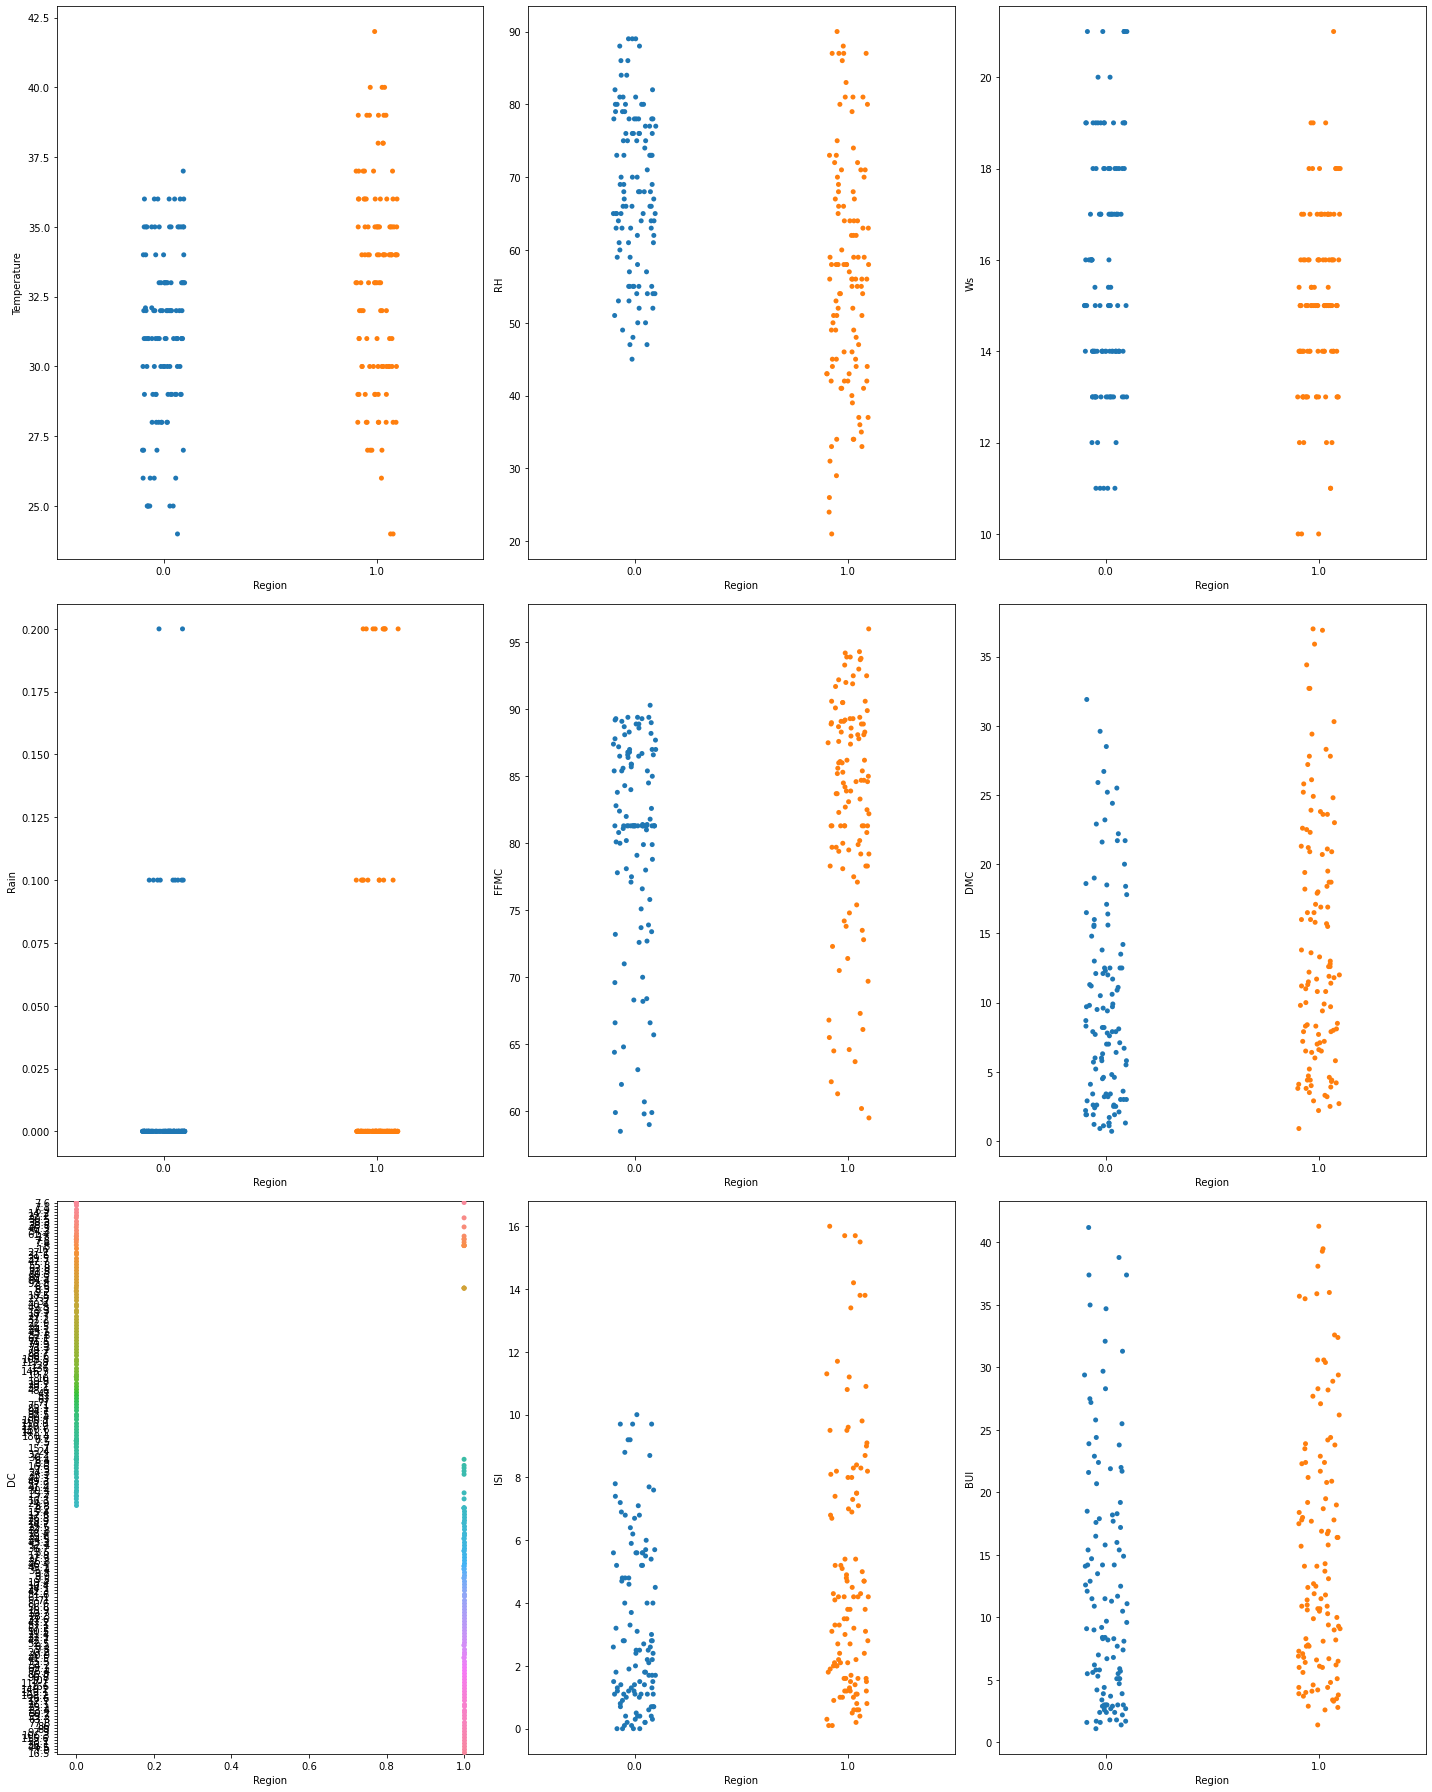

In [92]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [93]:
## Logistic Regression Model Creation

In [94]:
# importing all libraries that sre required
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [97]:
# Create a list of all the features which needs to be scaled
X = X[['Temperature', 'RH', 'Rain', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]

In [98]:
#Create object of StandardScaler class to perform standard scaling
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [99]:
# Check multicollinearity using VIF
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,2.140584,Temperature
1,2.390290,RH
2,1.072466,Rain
3,1.216264,Ws
4,2.501451,FFMC
5,20.158057,DMC
6,10.679056,DC
7,7.845461,ISI
8,52.937723,BUI
9,15.112357,FWI


In [100]:
# Perform train test split 
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 42)

In [101]:
# Create a object of Logistic Regression to perform model training
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [102]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
 pickle.dump(log_reg,f)

with open('sandardScalar.sav', 'wb') as f:
 pickle.dump(scalar,f)

In [103]:
# Predicit the value for x_test and store it in y_pred
y_pred = log_reg.predict(x_test)

In [104]:
# Performance metrics
# Test Data
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
auc = roc_auc_score(y_test, y_pred)
print(f" Confusion Matrix : {conf_mat}")
print(f" Accuracy : {accuracy*100}")
print(f" Precision : {Precision*100}")
print(f" Recall : {Recall*100}")
print(f" F1_Score : {F1_Score*100}")
print(f" AUC : {auc*100}")

 Confusion Matrix : [[22  4]
 [ 6 25]]
 Accuracy : 82.45614035087719
 Precision : 84.61538461538461
 Recall : 78.57142857142857
 F1_Score : 81.48148148148148
 AUC : 82.6302729528536


In [105]:
# Predicit the value for x_train and store it in y_predtest
y_predtest = log_reg.predict(x_train)


In [107]:
# Train Data
accuracy = accuracy_score(y_train,y_predtest)
conf_mat = confusion_matrix(y_train,y_predtest)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
auc = roc_auc_score(y_train, y_predtest)
print(f" Confusion Matrix : {conf_mat}")
print(f" Accuracy : {accuracy*100}")
print(f" Precision : {Precision*100}")
print(f" Recall : {Recall*100}")
print(f" F1_Score : {F1_Score*100}")
print(f" AUC : {auc*100}")

 Confusion Matrix : [[72 16]
 [25 57]]
 Accuracy : 75.88235294117646
 Precision : 81.81818181818183
 Recall : 74.22680412371135
 F1_Score : 77.83783783783784
 AUC : 75.66518847006651
